# Anticipating Market Reactions to Fed Policy

Author: Ben Rounds

*Last edit: 3/7/16*

In [3]:
import os
os.getcwd()

'C:\\Users\\Ben\\Documents\\DAT-NYC-30\\project'

In [4]:
import spacy
from spacy.en import English
import pandas as pd
import numpy as np
from spacy.en import English
from gensim.models.word2vec import Word2Vec
from bs4 import BeautifulSoup
import urllib2
import re
import datetime
import gensim
from sklearn.feature_extraction.text import CountVectorizer

In [508]:
import matplotlib.pyplot as plt
%matplotlib inline

Create list of url strings from which to scrape Fed policy statements. FOMC statement statements are pulled from the official website: http://www.federalreserve.gov/newsevents/press/monetary/2016monetary.htm.

For final iteration, save this as a separate file to make it prettier.

In [272]:
releases = ['http://www.federalreserve.gov/newsevents/press/monetary/20160127a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20151216a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20151028a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150917a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150729a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150617a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150429a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150318a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150128a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20141217a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20141029a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140917a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140730a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140618a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140430a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140319a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140129a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20131218a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20131030a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130918a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130731a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130619a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130501a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130320a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130130a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20121212a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20121024a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120913a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120801a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120620a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120425a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120313a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120125a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20111213a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20111102a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110921a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110809a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110622a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110427a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110315a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110126a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20101214a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20101103a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100921a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100810a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100623a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100428a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100316a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100127a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20091216a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20091104a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090923a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090812a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090624a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090429a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090318a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090128a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081216b.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081029a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081014a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081008a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080916a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080805a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080625a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080430a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080318a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080311a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080130a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080122b.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20071211a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20071031a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070918a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070807a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070618a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070509a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070321a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070131a.htm']

Load financial dictionary with terms and sentiments aggregated from 10-K statements.

Dictionary comes from http://www3.nd.edu/~mcdonald/Word_Lists.html

In [6]:
# Financial dictionary with sentiment classifications 
fin_dict =  pd.read_excel('LoughranMcDonald_MasterDictionary_2014.xlsx', 
                         header=0)
fin_dict = fin_dict.drop(fin_dict.columns[[1,2,3,4,5,6,17,18]],
                              axis=1)

In [7]:
fin_dict.head()

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV
0,AARDVARK,0,0,0,0,0,0,0,0,0,0
1,AARDVARKS,0,0,0,0,0,0,0,0,0,0
2,ABACI,0,0,0,0,0,0,0,0,0,0
3,ABACK,0,0,0,0,0,0,0,0,0,0
4,ABACUS,0,0,0,0,0,0,0,0,0,0


Dictionary includes the year in which a word was classified as a particular sentiment. For all words with nonzero sentiment scores, change the year to a 1 as to have binary classifiers.

In [8]:
# Change all nonzero elements to 1s
sentiments = ['Negative','Positive','Uncertainty','Litigious',
              'Constraining','Superfluous','Interesting']

for col in sentiments:
    fin_dict.ix[fin_dict[col] > 0, col] = 1

Change all words to lower case, as to provide for easier matching with words scraped from the web.

In [9]:
fin_dict['Word'] = fin_dict['Word'].str.lower()
fin_dict.head()

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV
0,aardvark,0,0,0,0,0,0,0,0,0,0
1,aardvarks,0,0,0,0,0,0,0,0,0,0
2,abaci,0,0,0,0,0,0,0,0,0,0
3,aback,0,0,0,0,0,0,0,0,0,0
4,abacus,0,0,0,0,0,0,0,0,0,0


Compress the dictionary to only include words for which there exists at least one nonzero sentiment rating.

In [10]:
# Find and remove rows with no sentiment score in dictionary
drop_rows = []
for i in range(fin_dict.shape[0]):
    if sum(fin_dict.iloc[i,1:7])==0:
        drop_rows.append(i)

In [11]:
# Create new dictionary with only sentiment-loaded words
fin_dict_abrev = fin_dict.drop(fin_dict.index[drop_rows])
fin_dict_abrev.head()

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV
9,abandon,1,0,0,0,0,0,0,0,0,1
10,abandoned,1,0,0,0,0,0,0,0,0,2
11,abandoning,1,0,0,0,0,0,0,0,0,2
12,abandonment,1,0,0,0,0,0,0,0,0,1
13,abandonments,1,0,0,0,0,0,0,0,0,2


Aggregate the words for which there exists some nonzero sentiment score in a set for faster searching and matching later.

In [12]:
# Put meaningful words in a set, aptly titled 'meaningful_words'
meaningful_words = set(fin_dict_abrev.Word)

In [13]:
# Show the reduction in the size of the full vs. abbreviated dictionaries
print "Words in original dictionary = {}.".format(fin_dict.shape[0])
print "Words in abreviated dictionary = {}.".format(fin_dict_abrev.shape[0])

Words in original dictionary = 85131.
Words in abreviated dictionary = 3916.


Begin scraping the web data using *Beautiful Soup*

In [15]:
# Read url with beautiful soup
page = urllib2.urlopen(releases[0])
soup = BeautifulSoup(page, 'lxml')

# Pull date object from each url
url_date = soup.find("p", {"id": "prContentDate"})
date_regex = re.compile("(?<=Date: )(?P<value>.*?)(?=<!)")
match = date_regex.search(str(url_date))
date = match.group()

# Convert date from 'Month DD, YYYY' to 'YYYY-MM-DD'
d = datetime.datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')
d

'2016-01-27'

Ensure this method produces consistent output through several dates.

In [16]:
# Check to confirm dates are being handled properly
for i in range(5):
    # scrape url with beautifulsoup
    page = urllib2.urlopen(releases[i])
    soup = BeautifulSoup(page, 'lxml')
    
    # pull Date
    url_date = soup.find("p", {"id": "prContentDate"})
    date_regex = re.compile("(?<=Date: )(?P<value>.*?)(?=<!)")
    match = date_regex.search(str(url_date))
    date = match.group()
    d = datetime.datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')
    print date
    print d
    print

January 27, 2016
2016-01-27

December 16, 2015
2015-12-16

October 28, 2015
2015-10-28

September 17, 2015
2015-09-17

July 29, 2015
2015-07-29



Format and parse the text data.

Recognize the tokenization of body.lower() as to match words to the lower-case dictionary.

In [17]:
# Extract text body from the webpage
body = soup.find("div", {"id": "leftText"}).getText()
nlp = English()
doc = nlp(body.lower())

Tokenize the body.

In [18]:
# Isolate the individual tokens
tokens = [t.orth_ for t in doc]
tokens

[u'\n\r\n\r\n\r\n\r\n\r\n',
 u'release',
 u'date',
 u':',
 u'july',
 u'29',
 u',',
 u'2015',
 u'\n\n\r\n\r\n    ',
 u'for',
 u'immediate',
 u'release',
 u'\r\n\n\n    \n      ',
 u'information',
 u'received',
 u'since',
 u'the',
 u'federal',
 u'open',
 u'market',
 u'committee',
 u'met',
 u'in',
 u'june',
 u'indicates',
 u'that',
 u'economic',
 u'activity',
 u'has',
 u'been',
 u'expanding',
 u'moderately',
 u'in',
 u'recent',
 u'months',
 u'.',
 u'growth',
 u'in',
 u'household',
 u'spending',
 u'has',
 u'been',
 u'moderate',
 u'and',
 u'the',
 u'housing',
 u'sector',
 u'has',
 u'shown',
 u'additional',
 u'improvement',
 u';',
 u'however',
 u',',
 u'business',
 u'fixed',
 u'investment',
 u'and',
 u'net',
 u'exports',
 u'stayed',
 u'soft',
 u'.',
 u'the',
 u'labor',
 u'market',
 u'continued',
 u'to',
 u'improve',
 u',',
 u'with',
 u'solid',
 u'job',
 u'gains',
 u'and',
 u'declining',
 u'unemployment',
 u'.',
 u'on',
 u'balance',
 u',',
 u'a',
 u'range',
 u'of',
 u'labor',
 u'market',
 u'i

View only tokens for which there exists a sentiment score in the dictionary.

In [19]:
# Assess the tokens that fall into words with sentiment scores in set 'meaningful_words'
tokens_imp = [t for t in tokens if t in meaningful_words]
tokens_imp

[u'improvement',
 u'improve',
 u'gains',
 u'declining',
 u'unemployment',
 u'suggests',
 u'underutilization',
 u'diminished',
 u'declines',
 u'stable',
 u'statutory',
 u'mandate',
 u'stability',
 u'mandate',
 u'risks',
 u'nearly',
 u'anticipated',
 u'improves',
 u'declines',
 u'progress',
 u'stability',
 u'anticipates',
 u'improvement',
 u'confident',
 u'anticipates',
 u'mandate',
 u'may']

View the frequency of the unique tokens.

In [20]:
# Calculate frequency of meaningful tokens
token_freq = []
for token in range(len(tokens_imp)):
    token_freq.append(tokens_imp.count(tokens_imp[token]))

frequency = pd.DataFrame(zip(tokens_imp, token_freq), columns = ['tokens', 'occurences'])
frequency.drop_duplicates('tokens')

,tokens,occurences
0,improvement,2
1,improve,1
2,gains,1
3,declining,1
4,unemployment,1
5,suggests,1
6,underutilization,1
7,diminished,1
8,declines,2
9,stable,1


Put it all together in a helper function!

In [21]:
# Create function to scrape and clean data from url
def scrape_web(url):
    # scrape webpage with beautiful soup
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    
    # pull Date
    url_date = soup.find("p", {"id": "prContentDate"})
    value_regex = re.compile("(?<=Date: )(?P<value>.*?)(?=<!)")
    match = value_regex.search(str(url_date))
    date = match.group()
    d = datetime.datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')
    
    # Extract text body from the webpage
    body = soup.find("div", {"id": "leftText"}).getText()
    nlp = English()
    doc = nlp(body.lower())
    
    # Isolate the individual tokens
    tokens = [t.orth_ for t in doc]
    tokens_imp = [t for t in tokens if t in meaningful_words]
    
    # Calculate frequency of meaningful tokens
    token_freq = []
    for token in range(len(tokens_imp)):
        token_freq.append(tokens_imp.count(tokens_imp[token]))
        
    frequency = pd.DataFrame(zip(tokens_imp, token_freq), columns = ['tokens', 'occurences'])

    # Return a list with two elements: (1) date, (2) a list of sentiment-laden tokens with their frequency
    return(d, frequency.drop_duplicates('tokens'))

In [22]:
%timeit scrape_web(releases[0])

1 loops, best of 3: 16.7 s per loop


This function is **incredibly slow**, but it does a lot of things I need it to do. 

In [23]:
test_data = scrape_web(releases[0])
test_data

('2016-01-27',               tokens  occurences
 0           suggests           1
 1           improved           2
 2             slowed           2
 3               late           1
 6             strong           1
 7              gains           1
 8            decline           1
 9   underutilization           1
 10          declines           3
 11          declined           1
 12         statutory           1
 13           mandate           1
 14         stability           1
 15        strengthen           1
 18       strengthens           1
 19             risks           1
 20       improvement           1
 21         shortfall           1
 22          progress           1
 23            depend           1
 24       anticipates           1)

Find sentiment score by iteratively adding tokens and their frequencies with their respective scores in the dictionary.

In [194]:
token = test_data[1].iloc[0,0]
print "Token = {}, token frequency = {}.".format(token, test_data[1][test_data[1]['tokens']==token].iloc[0,1])

Token = suggests, token frequency = 1.


In [195]:
# Search for token in dictionary
fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8]

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
73279,0,0,1,0,0,0,0


Create empty dataframe in which to record the aggregated sentiment data for all "meaningful" tokens in the document.

In [196]:
# Create empty dataframe in which to record scores
categories = ['Statement','Negative','Positive','Uncertainty','Litigious',
           'Constraining','Superfluous','Interesting']
fomc_data = pd.DataFrame([[0]*len(categories)], columns=categories)

In [197]:
# Dataframe to be used as a counter
pd.DataFrame(fomc_data.ix[0,1:8]).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,0,0,0,0,0,0,0


In [179]:
# Add the dictionary reference to a blank fomc_data 
fomc_data.Statement = test_data[0]
fomc_data.ix[0,1:8] = np.add(pd.DataFrame(fomc_data.ix[0,1:8]).T, 
                            # multiply the sentiment profile of each token by its frequency 
                            (pd.DataFrame(fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8]) *
                             test_data[1][test_data[1]['tokens']==token].iloc[0,1])).iloc[0,:]

In [180]:
fomc_data

,Statement,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2016-01-27,0,0,1,0,0,0,0


_____

In [198]:
# Test a few tokens:

for i in range(10):
    token = test_data[1].iloc[i,0]
    fomc_data.ix[0,1:8] = np.add(pd.DataFrame(fomc_data.ix[0,1:8]).T,
                                (fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8] *
                                 test_data[1][test_data[1]['tokens']==token].iloc[0,1])).iloc[0,:]
    
fomc_data   


,Statement,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,0,9,4,1,0,0,0,0


In [147]:
# Create zero row to begin calculating sentiment; can add using .iloc[i]
fomc_data.iloc[0] = ([0]*fomc_data.shape[1])

# Index the sentiment score-to-be with the date
fomc_data.Statement[0] = test_data[0]           # Will want to make this scrape_web(url)[0] later
fomc_data

,Statement,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2016-01-27,0,0,0,0,0,0,0


**NOTE:** try to write this as an apply function

In [201]:
# Will need to write a loop here to traverse the list 'releases'
# for statement in releases:

# Start new row for each data; WILL CHANGE to .iloc[j] when looping through releases
fomc_data.iloc[0] = ([0]*fomc_data.shape[1])
fomc_data.Statement[0] = test_data[0] 

# Traverse the list of tokens, adding the sentiment scores of each token along the way
for token in test_data[1].tokens:
    fomc_data.ix[0,1:8] = np.add(pd.DataFrame(fomc_data.ix[0,1:8]).T,        # WILL CHANGE [0] -> [j] when looping through 
                                (fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8] *
                                 # multiply the sentiment profile of each token by its frequency 
                                 test_data[1][test_data[1]['tokens']==token].iloc[0,1])).iloc[0,:]
    
    # Show occurrences and dicionary references to check for accuracy
    # Print functions WILL NOT be used in final iteration
    print "Occurrences = {}".format(test_data[1][test_data[1]['tokens']==token].iloc[0,1])
    print fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,:8]
    print

Occurrences = 1
           Word  Negative  Positive  Uncertainty  Litigious  Constraining  \
73279  suggests         0         0            1          0             0   

       Superfluous  Interesting  
73279            0            0  

Occurrences = 2
           Word  Negative  Positive  Uncertainty  Litigious  Constraining  \
36896  improved         0         1            0          0             0   

       Superfluous  Interesting  
36896            0            0  

Occurrences = 2
         Word  Negative  Positive  Uncertainty  Litigious  Constraining  \
69090  slowed         1         0            0          0             0   

       Superfluous  Interesting  
69090            0            0  

Occurrences = 1
       Word  Negative  Positive  Uncertainty  Litigious  Constraining  \
41445  late         1         0            0          0             0   

       Superfluous  Interesting  
41445            0            0  

Occurrences = 1
         Word  Negative  Positive  U

In [202]:
fomc_data

,Statement,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2016-01-27,10,9,4,1,2,0,0


In [203]:
type(fomc_data)

pandas.core.frame.DataFrame

Rewrite in such a way as to append the sentiment list to the existing web_scrape() list.

In [205]:
# Create object to record sentiment
sentiment_count = pd.DataFrame([[0]*len(sentiments)], columns=sentiments)

# Traverse the list of tokens - will change test_data[] to name of list
for token in test_data[1].tokens:
    sentiment_count = np.add(sentiment_count,        # WILL CHANGE [0] -> [j] when looping through 
                                (fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8] *
                                 # multiply the sentiment profile of each token by its frequency 
                                 test_data[1][test_data[1]['tokens']==token].iloc[0,1]))
    

In [206]:
sentiment_count

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,10,9,4,1,2,0,0


In [218]:
type(sentiment_count)

pandas.core.frame.DataFrame

In [222]:
# Convert test_data to list as to append with sentiment_count
new_test_data = list(test_data)
new_test_data.append(sentiment_count)

In [239]:
# new_test_data now includes the sentiment data for the document
new_test_data

['2016-01-27',               tokens  occurences
 0           suggests           1
 1           improved           2
 2             slowed           2
 3               late           1
 6             strong           1
 7              gains           1
 8            decline           1
 9   underutilization           1
 10          declines           3
 11          declined           1
 12         statutory           1
 13           mandate           1
 14         stability           1
 15        strengthen           1
 18       strengthens           1
 19             risks           1
 20       improvement           1
 21         shortfall           1
 22          progress           1
 23            depend           1
 24       anticipates           1,    Negative  Positive  Uncertainty  Litigious  Constraining  Superfluous  \
 0        10         9            4          1             2            0   
 
    Interesting  
 0            0  ]

Rewrite helper function to include sentiment data from the beginning!

In [251]:
# Create function to scrape and clean data from url
def scrapeNrate(url):
    # scrape webpage with beautiful soup
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    
    # pull Date
    url_date = soup.find("p", {"id": "prContentDate"})
    value_regex = re.compile("(?<=Date: )(?P<value>.*?)(?=<!)")
    match = value_regex.search(str(url_date))
    date = match.group()
    d = datetime.datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')
    
    # Extract text body from the webpage
    body = soup.find("div", {"id": "leftText"}).getText()
    nlp = English()
    doc = nlp(body.lower())
    
    # Isolate the individual tokens
    tokens = [t.orth_ for t in doc]
    tokens_imp = [t for t in tokens if t in meaningful_words]
    unique_tokens = list(set(tokens_imp))
    
    # Calculate frequency of meaningful tokens
    token_freq = []
    sentiment_count = pd.DataFrame([[0]*len(sentiments)], columns=sentiments)
    for token in range(len(unique_tokens)):
        # Record frequency with which tokens appear in the text
        token_freq.append(tokens_imp.count(tokens_imp[token]))
        # Record the contribution to sentiment of the word - i.e. dictionary sentiment * occurrence
        sentiment_count = np.add(sentiment_count,
                                    (fin_dict_abrev[fin_dict_abrev.Word == unique_tokens[token]].ix[:,1:8] *
                                     # multiply the sentiment profile of each token by its frequency 
                                     tokens_imp.count(tokens_imp[token])))
        
    # Compile a dataframe of each meaningful token along with its number of occurrences
    frequency = pd.DataFrame(zip(tokens_imp, token_freq), columns = ['tokens', 'occurences'])

    # Return a list with three elements: 
        # 1) date
        # 2) dataframe of tokens with their frequency
        # 3) dataframe of aggregated sentiment data from the website
    return(d, frequency, sentiment_count)

In [257]:
%timeit scrapeNrate(releases[0])

1 loops, best of 3: 19 s per loop


In [252]:
data = scrapeNrate(releases[0])

View the 3 components of the scrapeNrate object for the first link.

In [268]:
data[0]

'2016-01-27'

In [270]:
data[1].T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
tokens,suggests,improved,slowed,late,improved,slowed,strong,gains,decline,underutilization,...,declined,statutory,mandate,stability,strengthen,declines,declines,strengthens,risks,improvement
occurences,1,2,2,1,2,2,1,1,1,1,...,1,1,1,1,1,3,3,1,1,1


In [265]:
data[2]

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,10,14,4,2,2,0,0


___________________

** Pull data iteratively from releases[] list**

Will take a long time.

In [ ]:
#data = map(lambda x: scrapeNrate(x), releases)

In [298]:
data = []

for i in range(len(releases)):
    # Apply helper function on each link in 'releases'
    data.append(scrapeNrate(releases[i]))
    # Print a progress report to keep track of how many links are completed
    print "Completed with url {} of {}.".format(i, len(releases))

AttributeError: 'NoneType' object has no attribute 'group'

Error is okay so long as function call managed to pull sufficient data.

In [403]:
print "Websites successfully scraped = {}.".format(len(data))
print "Total Websites in 'releases' list = {}.".format(len(releases))

Websites successfully scraped = 59.
Total Websites in 'releases' list = 77.


Save data from helper function run to avoid any mistakes saving it over.

Instructions for saving from http://stackoverflow.com/questions/17225287/python-2-7-write-and-read-a-list-from-file

In [306]:
# Save the list object in case of mistakes so it can be loaded from file
import pickle

with open('function_list', 'wb') as f:
    pickle.dump(data, f)

In [359]:
### To load list in case of mistake
with open('function_list', 'rb') as f:
    data2 = pickle.load(f)
    
#data = data2

_______

Pull dates and sentiment data into a datafame for analysis.

In [370]:
dates = pd.Series(map(lambda x: x[0], data))

In [372]:
sentiment_scores = map(lambda x: x[2], data)

In [366]:
dates[0]

'2016-01-27'

In [402]:
sentiment_scores[0]

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,10,14,4,2,2,0,0


In [400]:
# Create dataframe with the sentiment data of the various FOMC statements
sentiment_ts = pd.DataFrame(columns = ['date'] + sentiments)

for i in range(len(dates)):
    row = sentiment_scores[i].copy()
    row.insert(0, 'date', dates[i])
    sentiment_ts = pd.concat([sentiment_ts, row])    

In [401]:
sentiment_ts.head()

,date,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2016-01-27,10,14,4,2,2,0,0
0,2015-12-16,10,11,4,1,3,0,0
0,2015-10-28,7,10,10,3,1,1,0
0,2015-09-17,10,10,12,2,2,1,0
0,2015-07-29,7,12,7,3,1,0,0


In [411]:
sentiment_ts.index = sentiment_ts.date
sentiment_ts = sentiment_ts.drop('date', axis=1)
sentiment_ts.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
date,,,,,,,
2016-01-27,10,14,4,2,2,0,0
2015-12-16,10,11,4,1,3,0,0
2015-10-28,7,10,10,3,1,1,0
2015-09-17,10,10,12,2,2,1,0
2015-07-29,7,12,7,3,1,0,0


**Load Excel data for currency returns and volatility.**

Returns and volatility have been modified in Excel rather than pandas. For transparency, this should be redone in the module.

Description of the variables:

- excel_returns = 2 week forward-looking returns of the various currency pairs with respect to the dollar
- excel_vol = 1 month forward daily return volatility (annualized) 

In [415]:
# Read the 1-day returns data from Excel
excel_returns = pd.read_excel('FX_data.xlsx', sheetname = '1D_Returns',
                               header = 0, index_col = 0)

# Read the 1-month volatility (annualized) data
excel_vol = pd.read_excel('FX_data.xlsx', sheetname = '1M_Return_Vol',
                           header = 0, index_col = 0)

In [448]:
excel_returns.tail()

,USDJPY Curncy,USDRUB Curncy,USDEUR Curncy,USDCAD Curncy,USDBRL Curncy,USDGBP Curncy,USDAUD Curncy,USDNZD Curncy,USDMXN Curncy
2016-02-08,-0.006429,0.021448,-0.009035,-0.004327,0.000000,-0.002750,0.002333,-0.001194,0.006920
2016-02-09,-0.015527,-0.005444,0.000113,0.004237,0.006464,-0.003631,-0.003690,-0.007554,0.007244
2016-02-10,-0.008273,0.009947,-0.002604,0.000789,0.015830,0.003329,-0.001920,-0.004567,0.010910
2016-02-11,0.007329,-0.017676,0.005853,-0.006282,0.002623,-0.002031,0.000355,0.012927,-0.012656
2016-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
excel_vol.tail()

,USDJPY Curncy,USDRUB Curncy,USDEUR Curncy,USDCAD Curncy,USDBRL Curncy,USDGBP Curncy,USDAUD Curncy,USDNZD Curncy,USDMXN Curncy
2016-02-08,0.138519,0.37172,0.095849,0.137728,0.174969,0.106098,0.139453,0.146986,0.172826
2016-02-09,0.138519,0.37172,0.095849,0.137728,0.174969,0.106098,0.139453,0.146986,0.172826
2016-02-10,0.138519,0.37172,0.095849,0.137728,0.174969,0.106098,0.139453,0.146986,0.172826
2016-02-11,0.138519,0.37172,0.095849,0.137728,0.174969,0.106098,0.139453,0.146986,0.172826
2016-02-12,0.138519,0.37172,0.095849,0.137728,0.174969,0.106098,0.139453,0.146986,0.172826


Subset both returns and volatility to only include EUR, GBP, and JPY and take the average of both.

In [423]:
# Subset to the three major reserve currencies
returns = excel_returns.copy()[['USDJPY Curncy','USDEUR Curncy','USDGBP Curncy']]
vol = excel_vol.copy()[['USDJPY Curncy','USDEUR Curncy','USDGBP Curncy']]

# For both metrics, reduce the three currencies by taking the average
returns = returns.apply(lambda x: np.mean(x), axis=1)
vol = vol.apply(lambda x: np.mean(x), axis=1)

Create two datasets for analysis: one with average returns as the dependent variable and one with average volatility.

In [498]:
# Append the return variable onto sentiment data by inserting as last column of dataframe
test = pd.DataFrame(sentiment_ts.iloc[1]).T.copy()
test.insert(len(test.columns), 'return', returns[returns.index == sentiment_ts.index[1]])
test

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,return
2015-12-16,10,11,4,1,3,0,0,0.005822


In [495]:
sentiment_returns = pd.DataFrame(columns = sentiments + ['Return'])
sentiment_vol = pd.DataFrame(columns = sentiments + ['Vol'])

for i in range(sentiment_ts.shape[0]):
    row_return, row_vol = pd.DataFrame(sentiment_ts.iloc[i]).T.copy(), pd.DataFrame(sentiment_ts.iloc[i]).T.copy()
    row_return.insert(len(sentiment_ts.columns), 'Return', returns[returns.index == sentiment_ts.index[i]])
    row_vol.insert(len(sentiment_ts.columns), 'Vol', vol[vol.index == sentiment_ts.index[i]])
    
    # Populate new dataframes appending return and vol respectively
    sentiment_returns = pd.concat([sentiment_returns, row_return])  
    sentiment_vol = pd.concat([sentiment_vol, row_vol])  
      

In [527]:
sentiment_returns.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Return
2016-01-27,10,14,4,2,2,0,0,-0.004045
2015-12-16,10,11,4,1,3,0,0,0.005822
2015-10-28,7,10,10,3,1,1,0,-0.002520
2015-09-17,10,10,12,2,2,1,0,0.005128
2015-07-29,7,12,7,3,1,0,0,0.002208


In [497]:
sentiment_vol.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol
2016-01-27,10,14,4,2,2,0,0,0.113489
2015-12-16,10,11,4,1,3,0,0,0.066108
2015-10-28,7,10,10,3,1,1,0,0.072199
2015-09-17,10,10,12,2,2,1,0,0.075782
2015-07-29,7,12,7,3,1,0,0,0.113366


In [614]:
sentiment_returns.Return.describe()

count    59.000000
mean      0.001264
std       0.005634
min      -0.016092
25%      -0.001652
50%       0.001360
75%       0.004779
max       0.013332
Name: Return, dtype: float64

**Transform return and volatility variables**

For Returns and volatility modeling, raw continuous numbers are of limited use. Want to transform both into categorical variables to be more meaningful in the context of magnitude and change.

For returns, transform the return variable to be 1 if two week return is greater than the 75th percentile, 0 if between the 25th and 75th percentile, and -1 if return is less than the 25th percentile. 

for volatility, consider restructuring the variable to represent a departure from the previous regime, e.g. 1 if one month forward volatility materially increased from past month, 0 if volatility is not materially unchanged, -1 if one month forward volatility has decreased significantly.

In [629]:
# Use map function to conditionally change 'Return' variable
sent_ret = sentiment_returns.copy()
sent_ret['Return'] = map(lambda x: 1 if x > sentiment_returns.Return.describe()[6]
                         else -1 if x < sentiment_returns.Return.describe()[4] 
                         else 0, sentiment_returns.Return)

In [633]:
sent_ret.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Return
2016-01-27,10,14,4,2,2,0,0,-1
2015-12-16,10,11,4,1,3,0,0,1
2015-10-28,7,10,10,3,1,1,0,-1
2015-09-17,10,10,12,2,2,1,0,1
2015-07-29,7,12,7,3,1,0,0,0


___________________ 


# Modeling:

- Model both datasets with the Nearest Neighbors algorithm
- Model data using logistic regression 
- Engineer a *senttiment* variable as (positive words - negative words)/(positive words + negative words) as per https://github.com/EuroSentiment/eurosentiment-tutorial-python/wiki/Creating-your-first-sentiment-analysis-application.

In [634]:
sent_ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 2016-01-27 to 2008-10-29
Data columns (total 8 columns):
Negative        59 non-null float64
Positive        59 non-null float64
Uncertainty     59 non-null float64
Litigious       59 non-null float64
Constraining    59 non-null float64
Superfluous     59 non-null float64
Interesting     59 non-null float64
Return          59 non-null int64
dtypes: float64(7), int64(1)
memory usage: 4.1+ KB


In [635]:
sent_ret['Return'] = pd.Categorical(sent_ret['Return'])

In [636]:
sent_ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 2016-01-27 to 2008-10-29
Data columns (total 8 columns):
Negative        59 non-null float64
Positive        59 non-null float64
Uncertainty     59 non-null float64
Litigious       59 non-null float64
Constraining    59 non-null float64
Superfluous     59 non-null float64
Interesting     59 non-null float64
Return          59 non-null category
dtypes: category(1), float64(7)
memory usage: 3.8+ KB


In [637]:
from sklearn.neighbors import KNeighborsClassifier

In [638]:
# Separate independent and dependent variables
X, y = sent_ret.iloc[:,:-1], sent_ret['Return']

In [639]:
X.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
2016-01-27,10,14,4,2,2,0,0
2015-12-16,10,11,4,1,3,0,0
2015-10-28,7,10,10,3,1,1,0
2015-09-17,10,10,12,2,2,1,0
2015-07-29,7,12,7,3,1,0,0


In [640]:
pd.DataFrame(y).head()

,Return
2016-01-27,-1
2015-12-16,1
2015-10-28,-1
2015-09-17,1
2015-07-29,0


In [641]:
X.corr()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
Negative,1.000000,0.102427,0.289142,0.150375,0.295839,0.176912,NaN
Positive,0.102427,1.000000,0.443396,0.113038,0.368029,0.460852,NaN
Uncertainty,0.289142,0.443396,1.000000,0.022291,0.606627,0.460513,NaN
Litigious,0.150375,0.113038,0.022291,1.000000,-0.086915,-0.011630,NaN
Constraining,0.295839,0.368029,0.606627,-0.086915,1.000000,0.357077,NaN
Superfluous,0.176912,0.460852,0.460513,-0.011630,0.357077,1.000000,NaN
Interesting,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variables are relatively uncorrelated, though may consider dropping superfluous, as this correlates highly with both 'Positive' and 'Uncertainty' I have no prior thesis regarding inclusion of words with this sentiment.

In [642]:
# Split data into testing vs training
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, pd.DataFrame(y), 
                                                    test_size=0.40, random_state=7)

In [643]:
# Cross-validate in 10 iterations with 60/40 split for consistency
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.60, random_state=0)

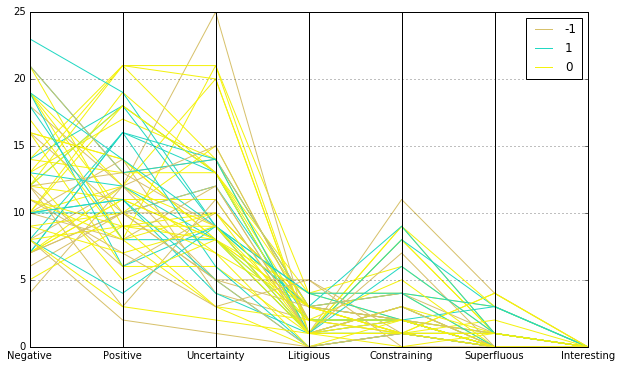

In [644]:
# Assess dispersion among our normalized variables w.r.t. class
plt.figure(figsize=(10,6))
pd.tools.plotting.parallel_coordinates(sent_ret, 'Return');

In [645]:
# Initialize kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [646]:
# Use GridSearch to find the optimal parameters for kNN
from sklearn.grid_search import GridSearchCV

parameters = {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'],
             'p': range(1,3)}

clf = GridSearchCV(knn, parameters, cv=cv)

Accept warning below (resulting from changing y to pd.DataFrame(y)) because this was the only solution to have the model run successfully.

In [649]:
clf.fit(X_train, y_train)

C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.p

GridSearchCV(cv=ShuffleSplit(35, n_iter=10, test_size=0.6, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [651]:
# Assign kNN parameters as the optimal parameters from GridSearch
best_knn = clf.best_estimator_
print clf.best_params_

{'n_neighbors': 11, 'weights': 'uniform', 'p': 1}


In [652]:
print "kNN prediction score = {}%".format(best_knn.score(X_test, y_test)*100)

kNN prediction score = 41.6666666667%


Prediction accuracy appears rather poor. Observe other measures of performance.

In [653]:
print "Observe the percentage of nonzero categorical returns is %.1f%%." % (
    float(sum(sent_ret['Return']!=0))/sent_ret.shape[0]*100)

Observe the percentage of nonzero categorical returns is 50.8%.


Assess precision, recall, and f1 score.

In [654]:
from sklearn.metrics import precision_recall_fscore_support

In [655]:
y_pred_test = best_knn.predict(X_test)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_pred_test, y_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_pred_test, y_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_pred_test, y_test, average='binary')[2]*100)

Precision = 87.1%, recall = 41.7% and f1 score = 56.4%.


C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  app.launch_new_instance()
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
C:

Precision is high for this model, implying there are very few false positives. However, recall is low, meaning the model allows for a large number of false negatives, which translates to missed opportunities for return.

In [656]:
y_test_assess = y_test.copy()
y_test_assess['Prediction'] = y_pred_test
y_test_assess

,Return,Prediction
2012-03-13,1,0
2013-07-31,1,0
2010-04-28,-1,0
2013-12-18,0,0
2014-10-29,0,0
2010-08-10,1,0
2011-11-02,-1,0
2014-03-19,0,0
2013-06-19,0,0
2012-04-25,-1,0


As shown above, high scores across various measures of performance result primarily from little variation in the dependent variable.

In [657]:
y_pred_train = best_knn.predict(X_train)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_pred_train, y_train, average='binary')[0]*100,
        precision_recall_fscore_support(y_pred_train, y_train, average='binary')[1]*100,
        precision_recall_fscore_support(y_pred_train, y_train, average='binary')[2]*100)

Precision = 92.4%, recall = 54.3% and f1 score = 67.3%.


C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  app.launch_new_instance()
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
C:

In [658]:
y_train_assess = y_train.copy()
y_train_assess['Prediction'] = y_pred_train
y_train_assess

,Return,Prediction
2012-06-20,1,0
2009-11-04,0,0
2011-01-26,0,0
2011-08-09,1,0
2009-12-16,1,-1
2014-12-17,0,0
2011-12-13,0,0
2015-10-28,-1,0
2010-12-14,1,0
2013-01-30,0,0


As observed above, all predictions on the test and train data predict a moderate two-week return, which, while probabilistically the likely result, does not help for predicting the extreme outcomes. 

Seek to improve performance by adding additional features.

# Left to do:

- Further modeling of both the return and volatility datasets with Nearest Neighbors
- Model data using other algorithms (logistic regression, possibly naive Bayes..?)
- Add features (sentiment score and possibly others)

# Other ideas??